Увеличение выручки интернет-магазина. Приоритизация гипотез и  анализ результатов А/В теста
=====================================================

## Описание проекта

Аналитическим отделом совместно с отделом маркетинга крупного интернет магазина подготовлен список гипотез для увеличения выручки.
Требуется:
- приоритизировать гипотезы
- запустить A/B-тест 
- проанализировать результаты. 

## Содержание проекта
### **Часть 1. Приоритизация гипотец**  
### **Часть 2. Анализ A/B-теста**  


## Часть 1. Приоритизация гипотец

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
# считаем файл с данными
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# приведем названия колонок к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()


In [4]:
#пронумеруем гипотезы с единицы, а не нуля
hypothesis = hypothesis.rename(index = lambda x: x+1)
hypothesis

,hypothesis,reach,impact,confidence,efforts
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6
2,"Запустить собственную службу доставки, что сок...",2,5,4,10
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
7,Показать на главной странице баннеры с актуаль...,5,3,8,3
8,Добавить форму подписки на все основные страни...,10,7,8,5
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
#снимем ограничение на количество выводимых символов в поле
pd.set_option('max_colwidth', 200)

In [6]:
# применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(2)
hypothesis[['hypothesis','ICE']].sort_values('ICE',ascending=False)

,hypothesis,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [7]:
# применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values('RICE',ascending=False)

,hypothesis,RICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Вывод
Параметр охвата пользователей (Reach), присутствующий в методе RICE, изменил приоритетность, полученную по методу ICE.

- Без учета охвата на первом месте идет акция со скидкой на ДР, но параметр Reach справедливо понизил приоритет этой акции, т.к. охват её минимальный (по сравнению с другими гипотезами увеличения выручки).
- Также произошло и с гипотезой о добавлении двух новых каналов трафика.
- При оценке методом RICE, на первом месте оказалась гипотеза 8 - "Добавить форму подписки на все основные страницы...", её оценка в 2 раза выше следующей гипотезы 3 - "Добавить блоки рекомендаций...". Что является результатом высоких показателей охвата пользователей - Reach, силы влияния на пользователей - Impact, уверенностью в оценках - Confidence и средним показателем трудозатрат - Efforts. В методе ICE охват пользователей - Reach не учитывается и гипотеза 8 - "Добавить форму подписки на все основные страницы..." оказалась только на 3 месте.

Наиболее приоритетными будут гипотезы 8, 3, 1. 

## Часть 2. Анализ А/В-теста

In [8]:
# считаем данные
orders, visitors = (
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv')
)

In [9]:
# исследуем данные в двух датасетах с помощью функции
def test_data(dataset):
    print(f'Столбцов: {dataset.shape[1]}\nCтрок: {dataset.shape[0]}')
    print()
    print('Типы данных в столбцах:')
    print(dataset.dtypes)
    print()
    print('Количество пропусков:', dataset.isna().sum().sum())
    print('Количество дубликатов:', dataset.duplicated().sum())
    print('='*40)

In [10]:
#выведем исследование на экран
for file in orders, visitors:
    display(file.head())
    test_data(file)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Столбцов: 5
Cтрок: 1197

Типы данных в столбцах:
transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

Количество пропусков: 0
Количество дубликатов: 0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Столбцов: 3
Cтрок: 62

Типы данных в столбцах:
date        object
group       object
visitors     int64
dtype: object

Количество пропусков: 0
Количество дубликатов: 0


In [11]:
# преобразование данных о времени
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
# проверим пересечения в группах
group_a = orders.query('group == "A"') 
group_b = orders.query('group == "B"')
  
# число пользователей, попавших в обе группы 
both_group = list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(both_group)

58

In [13]:
# исключим пользователей с пересечением в группах
orders = orders.query('visitorId not in @both_group')

#### Вывод:
Загрузили данные, пропусков и дубликатов нет. 58 пользователей оказались в обоих группах, пересечения убраны. 

In [14]:
# датафрейм с уникальными парами значений date и group
datesGroups = orders[['date', 'group']].drop_duplicates()

In [15]:
# аггрегированные кумулятивные данные по выручке за каждый день по заказам
ordersAggregated = datesGroups.apply(lambda x:
orders[np.logical_and(orders['date'] <= x['date'],
orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [16]:
# выведем на экран
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [17]:
# аггрегированные кумулятивные данные за каждый день по пользователям
visitorsAggregated = datesGroups.apply(lambda x:
visitors[np.logical_and(visitors['date'] <= x['date'],
visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
# выведем на экран
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [19]:
# объеденим агрегации
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'],
right_on=['date', 'group'])

# переименуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# выведем на экран 
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Полученная таблица cumulativeData содержит в себе следующие данные:

- date — дата;

- group — группа A/B-теста (A или B);

- orders — кумулятивное количество заказов на указанную дату в указанной группе;

- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);

- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

#### Построим графики кумулятивной выручки по дням и группам A/B-тестирования

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

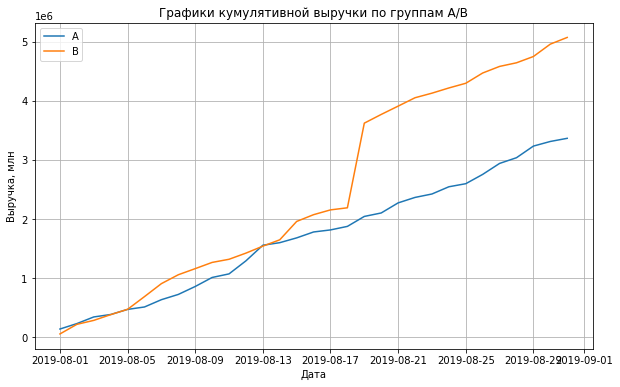

In [21]:
plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка, млн')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.grid()

#### Вывод
Выручка группы В явно выше группы А. График выручки группы А растет равномерно, группы В - в основном с равномерными участками роста, также присутствует резкий скачок выручки. Это может сигнализировать о росте числа заказов либо об увеличении стоимости заказов.

In [22]:
# посчитаем средний чек
cumulativeData['mean'] = round(cumulativeData['revenue'] / cumulativeData['orders'], 2)
# выведем на экран
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,mean
0,2019-08-01,A,23,19,142779,719,6207.78
1,2019-08-01,B,17,17,59758,713,3515.18
2,2019-08-02,A,42,36,234381,1338,5580.50
3,2019-08-02,B,40,39,221801,1294,5545.02
4,2019-08-03,A,66,60,346854,1845,5255.36


#### Построим графики кумулятивного среднего чека по группам 

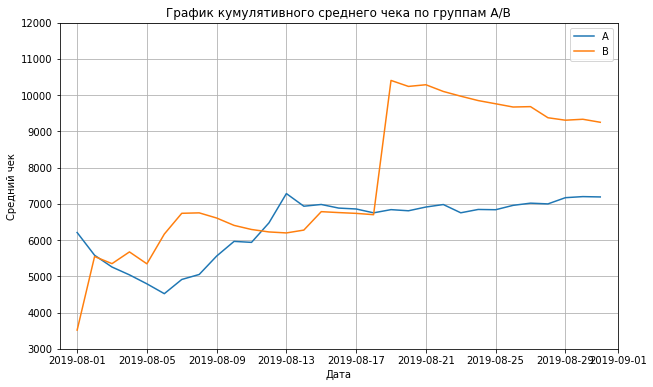

In [23]:
#разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 3000,12000])

plt.title('График кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.grid()

#### Вывод
Средний чек стабилизируется от середины для группы A и резко вырастает и начинает падать для группы B. Группа B имеет нестабильный средний чек. Присутствует два относительно стабильных участка: примерно с 07 по 18 августа на уровне 6-7 тыс. А также после резкого скачка (возможно, что в группу B попали дорогие заказы) суммы среднего чека идет стабильный участок монотонного убывания примерно до уровня 9 тыс. 

#### График относительного изменения кумулятивного среднего чека группы B к группе A

In [24]:
# соберем данные о кумулятивной выручке двух групп в отдельный датасет и выведем на экран
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,\
                                                   left_on ='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


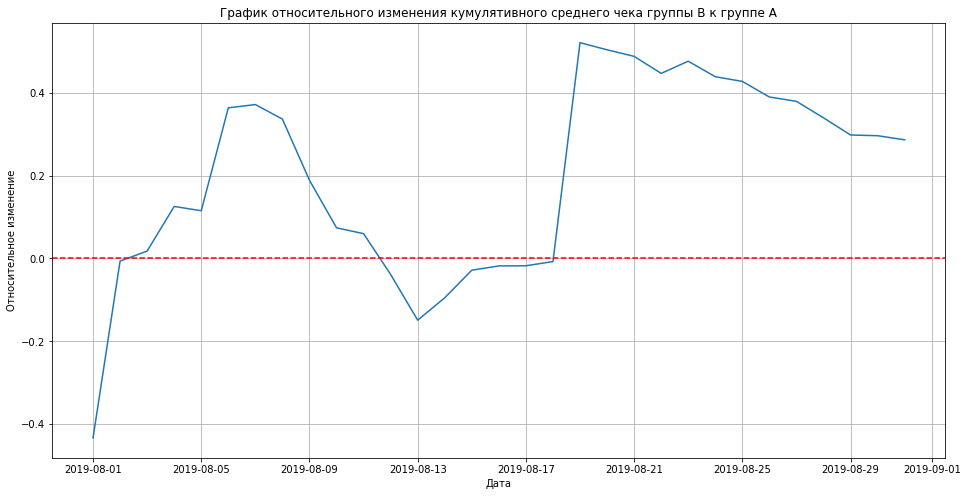

In [25]:
plt.figure(figsize=(16, 8))
ax1 = sns.lineplot(mergedCumulativeRevenue['date'],\
                   (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,\
                  palette=sns.color_palette('Set2', n_colors=1))
ax1.set_title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid()
plt.show();

#### Вывод
По соотношению средних чеков видно, что в группу B попали крупные заказы (резкий всплеск на графике). Группа B лучше группы А по данному показателю, на всем временном участке кроме периода 13 - 18 августа. 

#### Построим график кумулятивного среднего количества заказов на посетителя по группам

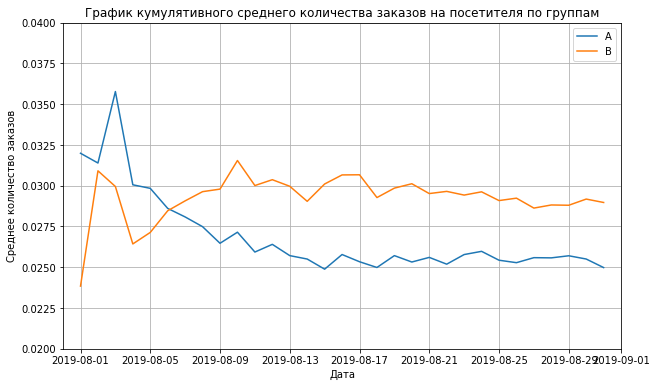

In [26]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['cum_avg'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['cum_avg'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['cum_avg'], label='B')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0.02, 0.04])

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.grid()
plt.legend()
plt.show()

#### Вывод
На группу A выпадает наибольшее значение (пик) кумулятивного среднего количества заказов на пользователя, скорее всего, было зафиксировано аномально-высокое количество посетителей, однако в действительности, уже после 5 августа значения у этой группы становятся стабильно хуже, чем у группы B
Значения среднего у двух групп распределены неравномерно, однако к концу графика колебания все более "сглаживаются" и кривые сближаются. 

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

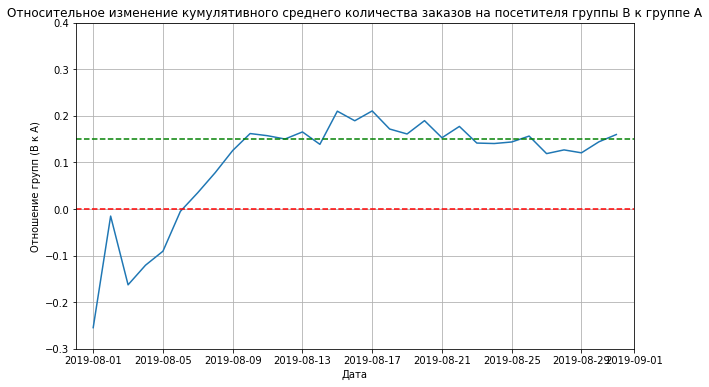

In [27]:
mergedCumulativeAVG = (cumulativeDataA[['date','cum_avg']]
                               .merge(cumulativeDataB[['date','cum_avg']], 
                                      left_on='date', 
                                      right_on='date', 
                                      how='left', 
                                      suffixes=['A', 'B'])
                              )

plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeAVG['date'], (
         mergedCumulativeAVG['cum_avgB']/mergedCumulativeAVG['cum_avgA'])-1)


plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.15, color='green', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Отношение групп (В к А)')

plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.3, 0.4])
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.grid()

#### Вывод
В начале теста группа B проигрывала группе A, затем вырвалась вперёд. После рывка её кумулятивное среднее количество заказов на посетителя постепенно падает. Стоит проанализировать аномалии, возможно, они влияют на поведение графиков.

#### Построим точечный график количества заказов по пользователям.

In [28]:
# рассчитаем количество заказов на каждого пользователя
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
# выведем на экран
ordersByUsers.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


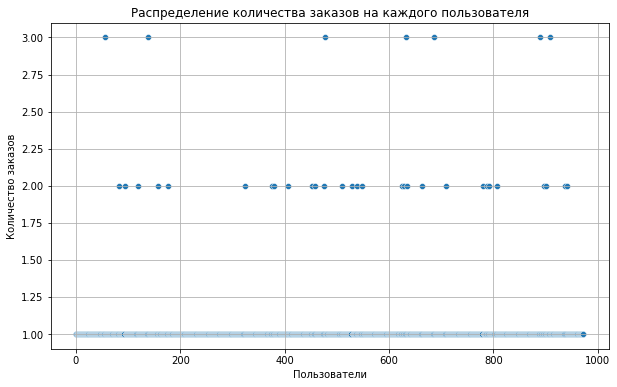

In [29]:
# график распределения количества заказов на каждого пользователя

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=x_values, y=ordersByUsers['transactionId'])
plt.title('Распределение количества заказов на каждого пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid()
plt.show();

**Основная масса пользователей делает один заказ. Пользователей с 2-3 заказами гораздо меньше.**

#### 95-й и 99-й перцентили количества заказов на пользователя


In [30]:
percentile_for_transaction = np.percentile(ordersByUsers['transactionId'], [95,99])
percentile_for_transaction

array([1., 2.])

#### Точечный график стоимостей заказов


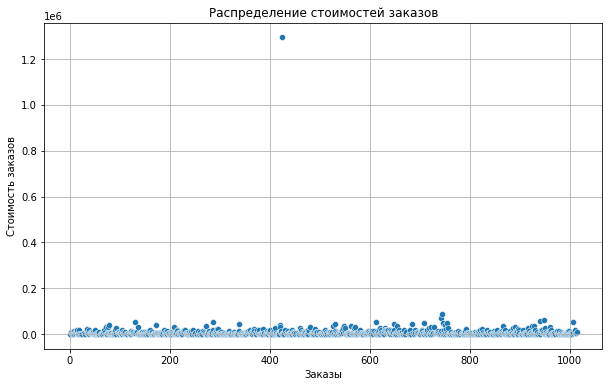

In [31]:
# построим график стоимостей заказов

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x= x_values, y = orders['revenue'])
plt.title('Распределение стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show();

**Основная масса стоимостей заказов сосредоточена в одном диапазоне (около 50000 ед). Аномальные значения практически отсутствуют.**

#### 95-й и 99-й перцентили стоимости заказов

In [32]:
percentile_for_transaction_price = np.percentile(orders['revenue'], [95,99])
percentile_for_transaction_price

array([26785., 53904.])

In [33]:
abnormal_order_limit = percentile_for_transaction[1]
abnormal_revenue_limit = percentile_for_transaction_price[1]

#### Выводы по перцентилям

- Не более 1% пользователей делают более 2 заказов и не более 5 % - более 1 заказа. 
- Не более 1% заказов превышат сумму 53904 ден.ед и не более 5 % - 26785 ден.ед. 

**Примем за аномальных пользователей тех, которые совершили более двух заказов и на сумму более 54 тысяч рублей.**

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

**Сформулируем гипотезы.**

- Нулевая: Статистически значимых различий в среднем количестве заказов на посетителя между группами по сырым данным нет. 
- Альтернативная: Статистически значимые различия в среднем количестве заказов на посетителя между группами по сырым данным есть.

Зададим критический уровень статистической значимости alpha = 0,05.
Проверяем гипотезы с помощью непараметрического теста Уилкоксона-Манна-Уитни

In [34]:
# сгруппируем посетителей по дням и получим кумулятивные данные о посетителях по группе А 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


In [35]:
# сгруппируем посетителей по дням и получим кумулятивные данные о посетителях по группе В 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [36]:
# сгруппируем количество заказов и выручку по дням и получим кумулятивные данные по группе А 
ordersADaily = (orders.query('group == "A"')
                 .groupby('date', as_index=False)
                 .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']


In [37]:
# сгруппируем количество заказов и выручку по дням и получим кумулятивные данные по группе B
ordersBDaily = (orders.query('group == "B"')
                 .groupby('date', as_index=False)
                 .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

Объединим данные в единую таблицу где:

- date — дата;

- ordersPerDateA — количество заказов в выбранную дату в группе A;

- revenuePerDateA — суммарная выручка в выбранную дату в группе A;

- ordersPerDateB — количество заказов в выбранную дату в группе B;

- revenuePerDateB — суммарная выручка в выбранную дату в группе B;

- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;

- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;

- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;

- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;

- visitorsPerDateA — количество пользователей в выбранную дату в группе A;

- visitorsPerDateB — количество пользователей в выбранную дату в группе B;

- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [38]:
# объединим данные в единую таблицу
total = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
total.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [39]:
# сгруппируем заказы по пользователям для группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# сгруппируем заказы по пользователям для группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [40]:
# выделим всех пользователей и число заказов для каждого в тч 0
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(total['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                                 ), name='orders')
    ],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(total['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                                 ), name='orders')
    ],axis=0)


In [41]:
# Выведем относительный прирост группы B
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.011
0.160


#### Вывод
p-value меньше 0,05 поэтому нулевую гипотезу отвергаем - статистически значимые различия в среднем количестве заказов на посетителя между группами есть. Относительный прирост группы В к группе А равен 16%

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем гипотезы.**

- Нулевая: Статистически значимых различий в среднем чеке между группами по сырым данным нет. 
- Альтернативная: Статистически значимые различия в среднем чеке между группами по сырым данным есть.

Зададим критический уровень статистической значимости alpha = 0,05.
Проверяем гипотезы с помощью непараметрического теста Уилкоксона-Манна-Уитни

In [42]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


#### Вывод
p-value больше 0,05 не отвергаем нулевую гипотезу - статистически значимых различий в среднем чеке между группами нет. Относительное различие среднего чека между группами 28,7%

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

**Сформулируем гипотезы.**

- Нулевая: Статистически значимых различий в среднем количестве заказов на посетителя между группами по очищенным данным нет. 
- Альтернативная: Статистически значимые различия в среднем количестве заказов на посетителя между группами по очищенным данным есть.

Зададим критический уровень статистической значимости alpha = 0,05.
Проверяем гипотезы с помощью непараметрического теста Уилкоксона-Манна-Уитни

Ранее мы определили границу количества аномальных заказов - 2, границу суммы аномальных заказов - 53904 ден.ед. Сделаем срезы пользователей с числом заказов больше ц — usersWithManyOrders и пользователей, совершивших заказы дороже 53904 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

In [43]:
display(abnormal_order_limit)
abnormal_revenue_limit

2.0

53904.0

In [44]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > abnormal_order_limit]['userId'],
     ordersByUsersB[ordersByUsersB['orders'] > abnormal_order_limit]['userId'],
    ],axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > abnormal_revenue_limit]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

print(abnormalUsers.head())
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


#### Вывод
**Найдено 16 аномальных пользователей**

In [45]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
                   ]['orders'],
     pd.Series(0, index=np.arange(total['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
                   ]['orders'],
     pd.Series(0, index=np.arange(total['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)
# статистический критерий Манна-Уитни
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.189


#### Вывод
p-value меньше 0,05 - различия есть. Нулевую гипотезу отвергаем. Как и в случае с "сырыми" данными, в "очищенных" данных статистическая значимость достигнута, сегмент группы В лучше сегмента А. Относительный прирост среднего количества заказов группы В к группе А равен 18,9%. 

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Сформулируем гипотезы.**

- Нулевая: Статистически значимых различий в среднем чеке между группами по очищенным данным нет. 
- Альтернативная: Статистически значимые различия в среднем чеке между группами по очищенным данным есть.

Зададим критический уровень статистической значимости alpha = 0,05.
Проверяем гипотезы с помощью непараметрического теста Уилкоксона-Манна-Уитни

In [46]:
print('{0:.3f}'.format(
    stats.mannwhitneyu(orders[
        np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers))
                      )]['revenue'], 
                       orders[
        np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers))
                      )]['revenue'])[1]))

print("{0:.3f}".format(orders[
        np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers))
                      )]['revenue'].mean()
        / orders[
        np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers))
                      )]['revenue'].mean() - 1))

0.788
-0.032


#### Вывод
Нулевую гипотезу не отвергаем. Анализ "очищенных" данных показывает, что в среднем чеке статистических значимых различий между группами нет. Относительное различие среднего чека между группами -3,2%

### Решение по результатам теста

- Графики кумулятивной выручки и кумулятиного среднего чека показали, что группа В эффективнее группы А, выручка выше и средний чек больше. Среднее количество заказов на посетителя по группе В так же выше. Мы предположили, что в данных есть выбросы.

Статистическая значимость на "сырых" данных показала:

- различия в в среднем количестве заказов на посетителя между группами есть,
- в среднем чеке различий нет
 
На основе "очищенных" данных выявлено:

- различия в среднем количестве заказов на посетителя между группами есть,
- в среднем чеке различий нет.

**Можем сделать вывод, что результаты группы В превышают результаты группы А. Следует зафиксировать победу группы В и остановить тест.**